In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import pandas as pd

df = pd.read_csv(
    '../data/MachineLearningRating_v3.txt',
    sep='|',
    engine='python',          # Use Python parser (important!)
    on_bad_lines='skip',      # Skip corrupted rows
    encoding='utf-8-sig'
)

print("Shape:", df.shape)
print(df.head())


Shape: (1000098, 52)
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...   

In [27]:
df.shape

(1000098, 52)

In [28]:
df = df.replace(['Not specified', '', ' '], pd.NA)

In [29]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [30]:
df_clean = df.dropna()

In [31]:
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
overall_loss_ratio


np.float64(1.0477452570332206)

In [32]:
province_lr = (
    df.groupby('Province')
      .apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
      .sort_values(ascending=False)
)

province_lr.head(10)


C:\Users\hp\AppData\Local\Temp\ipykernel_19032\872068034.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64

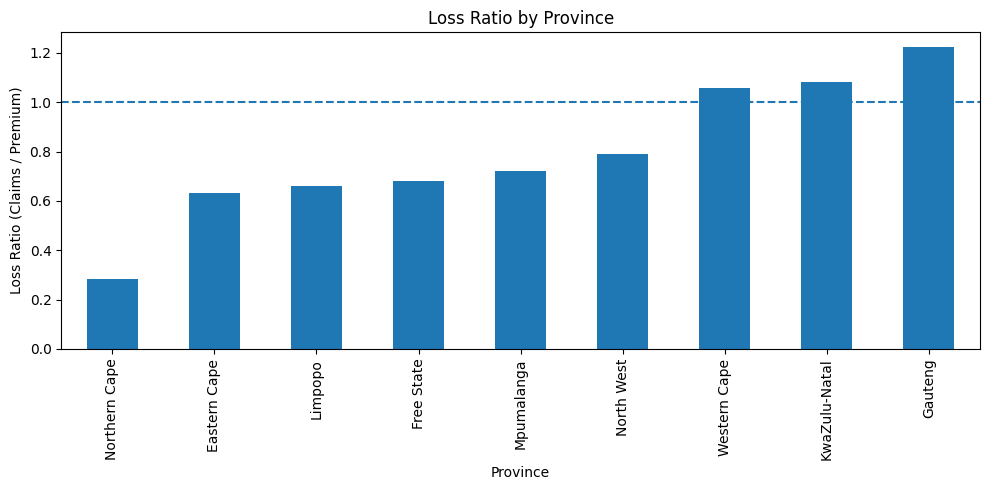

In [33]:
province_lr.sort_values().plot(kind='bar', figsize=(10,5))
plt.axhline(1, linestyle='--')  # break-even line
plt.title("Loss Ratio by Province")
plt.ylabel("Loss Ratio (Claims / Premium)")
plt.tight_layout()
plt.show()


In [34]:
gender_lr = (
    df.groupby('Gender')
      .apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
)

gender_lr


C:\Users\hp\AppData\Local\Temp\ipykernel_19032\420311112.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


Gender
Female    0.821879
Male      0.883910
dtype: float64

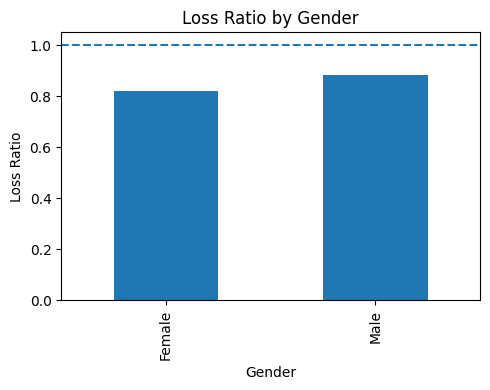

In [35]:
gender_lr.plot(kind='bar', figsize=(5,4))
plt.axhline(1, linestyle='--')
plt.title("Loss Ratio by Gender")
plt.ylabel("Loss Ratio")
plt.tight_layout()
plt.show()
